****
# Introduction #
****


**This notebook's aim is to correctly predict the number of product sold between the periods of 2019-01-01 and 2019-12-31 by taking into account the data from 2010-01-01 to 2018-12-31**

**If you liked this notebook kindly Upvote :)**

**Kindly Provide Feedback and suggestions to improve this notebook**

****
# Dataset Description #
****

This dataset contains simulated time series data covering 10 years (2010-2019). The features include date, store id, product id and number sold. The train.csv covers the years 2010-2018 and the test.csv covers 2019 only. The are 7 unique stores and 10 unique products. The are no null values. The objective is to predict the number sold feature in the test.csv.

****
# Reading and Displaying Training and Testing Data #
****

In [1]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading and Displaying Training data
tr=pd.read_csv(r'/kaggle/input/time-series-practice-dataset/train.csv')
tr

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808
...,...,...,...,...
230085,2018-12-27,6,9,890
230086,2018-12-28,6,9,892
230087,2018-12-29,6,9,895
230088,2018-12-30,6,9,899


In [3]:
# Reading and Displayinh Testing data
te=pd.read_csv(r'/kaggle/input/time-series-practice-dataset/test.csv')
te

,Date,store,product,number_sold
0,2019-01-01,0,0,845
1,2019-01-02,0,0,851
2,2019-01-03,0,0,840
3,2019-01-04,0,0,842
4,2019-01-05,0,0,845
...,...,...,...,...
25545,2019-12-27,6,9,901
25546,2019-12-28,6,9,926
25547,2019-12-29,6,9,913
25548,2019-12-30,6,9,899


****
# TIme Series for Product 0 in Store 0 #
****

let us first try to forcast the number_sold for product 0 in store 0.

We will then try to do it for the rest of the products and stores

## Preprocessing ##

In [4]:
# Creating a new training dataframe which only consists of Product 0 in store 0
tdf=tr.loc[(tr['store']==0)&(tr['product']==0)].copy()
tdf.drop(columns=['store','product'],inplace=True)
tdf['Date']=pd.to_datetime(tdf['Date'],format='%Y-%m-%d')
tdf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3287 entries, 0 to 3286
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         3287 non-null   datetime64[ns]
 1   number_sold  3287 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 77.0 KB


In [5]:
tdf.set_index('Date',inplace=True) # Setting the index as Date
tdf

,number_sold
Date,
2010-01-01,801
2010-01-02,810
2010-01-03,818
2010-01-04,796
2010-01-05,808
...,...
2018-12-27,847
2018-12-28,854
2018-12-29,839


In [6]:
# Creating a new testing dataframe which only consists of Product 0 in store 0
tedf=te.loc[(te['store']==0)&(te['product']==0)].copy()
tedf.drop(columns=['store','product'],inplace=True)
tedf['Date']=pd.to_datetime(tedf['Date'],format='%Y-%m-%d')
tedf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         365 non-null    datetime64[ns]
 1   number_sold  365 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 8.6 KB


In [7]:
tedf.set_index('Date',inplace=True) # Setting the index as Date
tedf

,number_sold
Date,
2019-01-01,845
2019-01-02,851
2019-01-03,840
2019-01-04,842
2019-01-05,845
...,...
2019-12-27,848
2019-12-28,856
2019-12-29,855


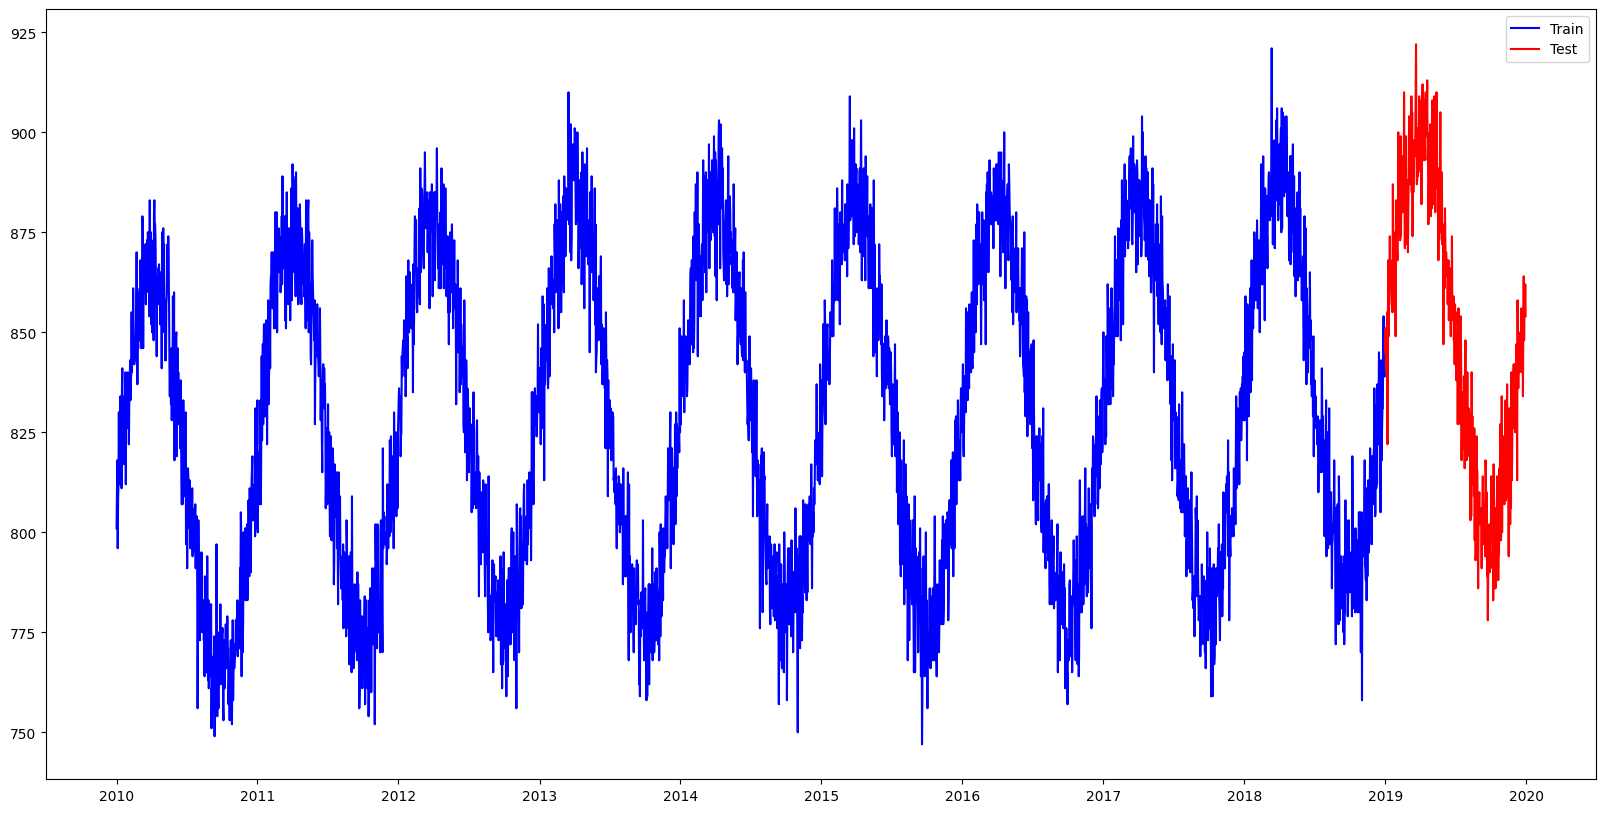

In [8]:
# Plotting the Data we have on Product 0 in store 0
# Blue represents our training data and the red represents our testing data or the duration which we need to predict.
plt.figure(figsize=(20,10))
plt.plot(tdf,color='blue',label='Train')
plt.plot(tedf,color='red',label='Test')
plt.legend()
plt.show()

## Assessing Stationarity ##

In [9]:
# importing 
from statsmodels.tsa.stattools import adfuller,pacf,acf
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
from statsmodels.tsa.seasonal import seasonal_decompose

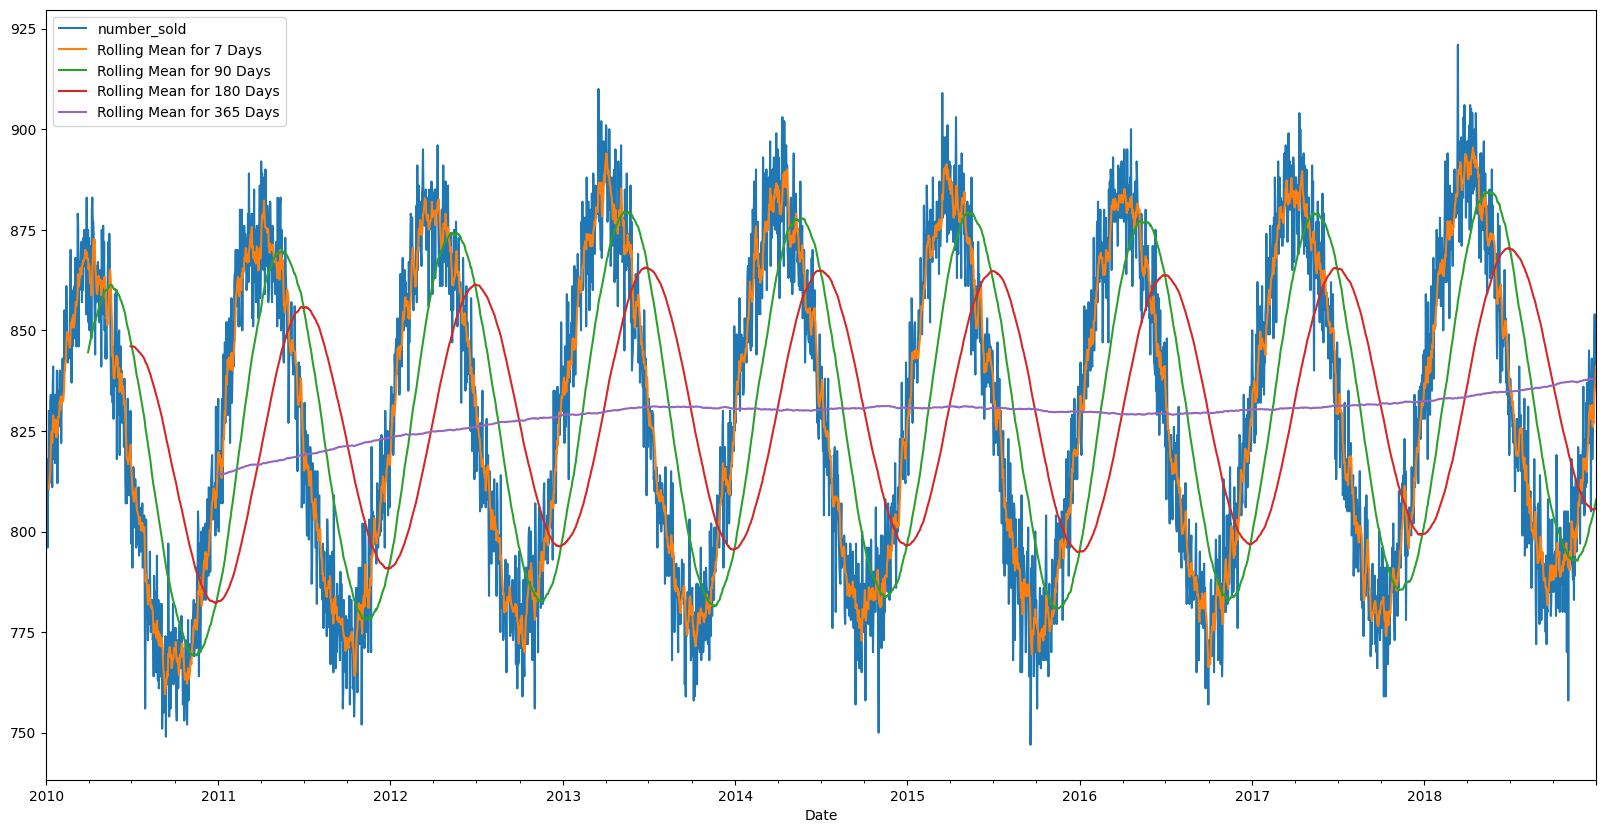

In [10]:
# Plotting the data with rolling mean for Weekly,Quaterly, Half Yearly and Yearly

plt.figure(figsize=(20,10))
tdf['number_sold'].plot()
tdf['number_sold'].rolling(7).mean().plot(label='Rolling Mean for 7 Days')
tdf['number_sold'].rolling(90).mean().plot(label='Rolling Mean for 90 Days')
tdf['number_sold'].rolling(180).mean().plot(label='Rolling Mean for 180 Days')
tdf['number_sold'].rolling(365).mean().plot(label='Rolling Mean for 365 Days')
plt.legend()
plt.show()


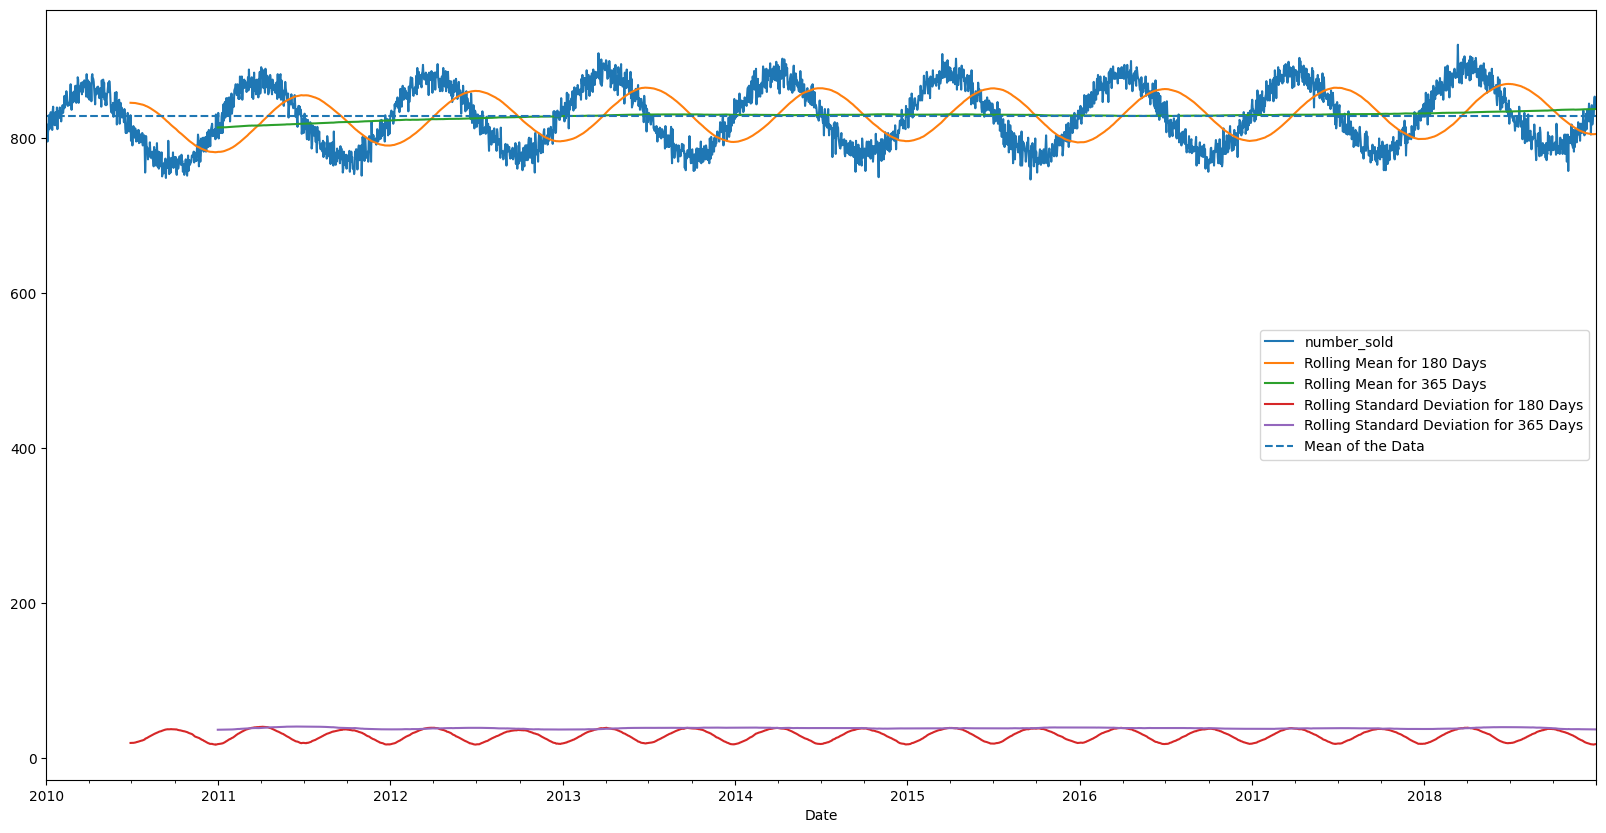

In [11]:
# Plotting a graph to check for Stationarity
# We cannot solely determine Stationarity based on the graph but it gives us some idea

plt.figure(figsize=(20,10))
tdf['number_sold'].plot()
tdf['number_sold'].rolling(180).mean().plot(label='Rolling Mean for 180 Days')
tdf['number_sold'].rolling(365).mean().plot(label='Rolling Mean for 365 Days')
tdf['number_sold'].rolling(180).std().plot(label='Rolling Standard Deviation for 180 Days')
tdf['number_sold'].rolling(365).std().plot(label='Rolling Standard Deviation for 365 Days')
plt.axhline(tdf['number_sold'].mean(),linestyle='--',label='Mean of the Data')
plt.legend()
plt.show()

1. From the plot we can see that the rolling mean for 365 days is constant over time.
2. From the plot we can understand that the rolling standard Deviation is also constant over time
3. From the above plot we can see that there is Seasonality
4. We dont have a unit root (Let us confirm using the ADFuller Test)

In [12]:
# Let us use the ADFuler Test to confirm if we have a unit root or not
result = adfuller(tdf['number_sold'])

# Display the results
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

# Interpret the p-value
if result[1] <= 0.05:
    print("The series is likely stationary (reject null hypothesis).")
else:
    print("The series is likely non-stationary (fail to reject null hypothesis).")

ADF Statistic: -5.051464907455918
p-value: 1.7536429088011978e-05
Critical Values: {'1%': -3.4323593525669414, '5%': -2.8624278120183573, '10%': -2.567242601304915}
The series is likely stationary (reject null hypothesis).


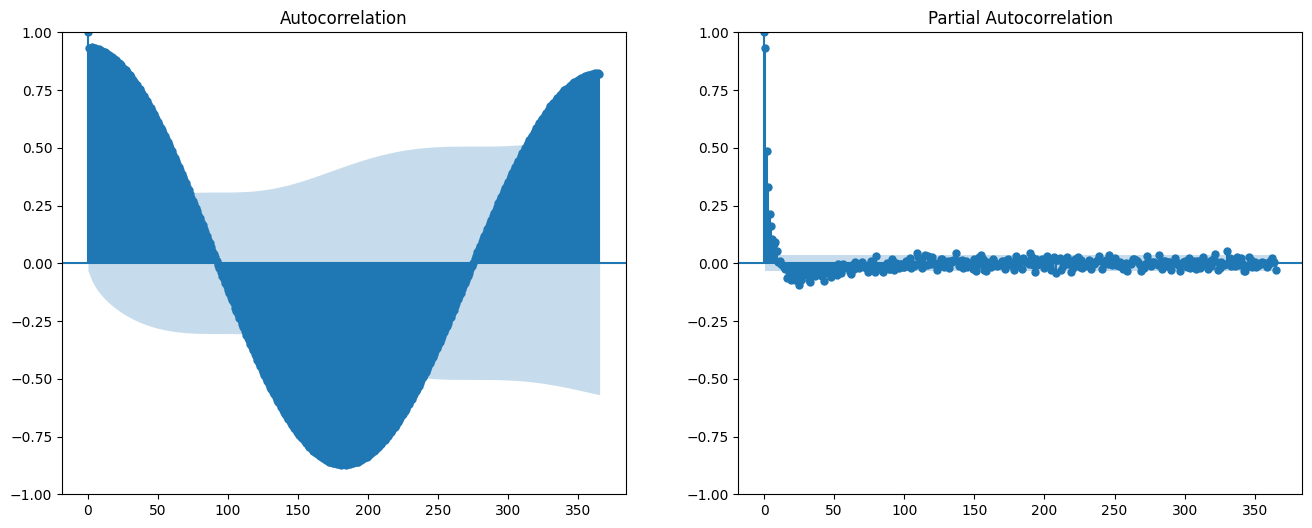

In [13]:
# We dont have a unit root but our data is not yet stationary as it still has Seasonality
# To visualize it we have the above plots but let us plot the pacf and acf too

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(tdf['number_sold'], lags=365, ax=axes[0])  # ACF plot
plot_pacf(tdf['number_sold'], lags=365, ax=axes[1])  # PACF plot
plt.show()

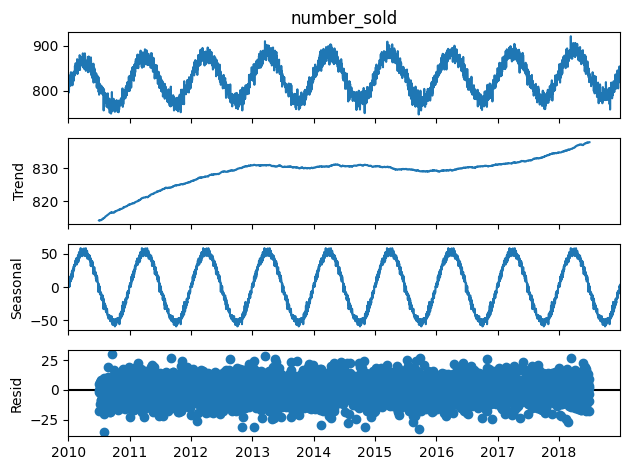

In [14]:
# To further confirm that Seaonality is present let us plot the Seasonal Decomposition Graph
decomposition = seasonal_decompose(tdf['number_sold'], model='additive', period=365)
decomposition.plot()
plt.show()


## Implementing Solutions ##

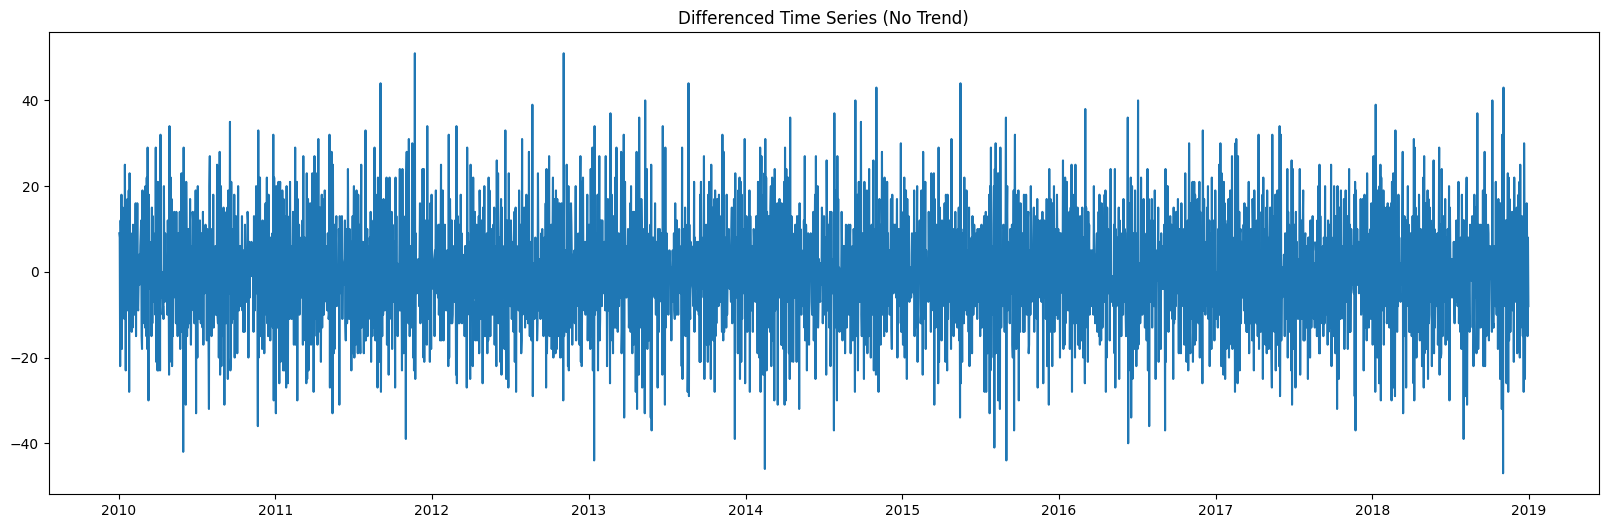

In [15]:
# It is confirmed our data has Sesonality let us solve it by using Seasonality Differencing
tdf['diff'] = tdf['number_sold'] - tdf['number_sold'].shift(1)
tdf.dropna(inplace=True)
plt.figure(figsize=(20, 6))
plt.plot(tdf['diff'])
plt.title('Differenced Time Series (No Trend)')
plt.show()

In [16]:
# Let us to the ADFuller test again and plot all the plots again to confirm
result = adfuller(tdf['diff'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -5.604247851143452
p-value: 1.2446461152862605e-06


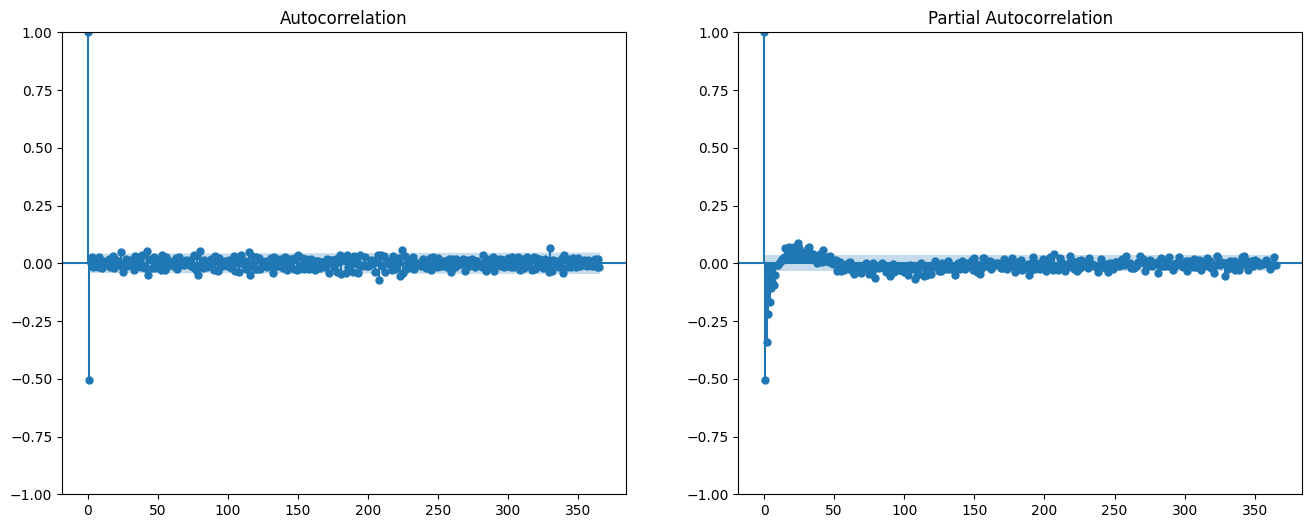

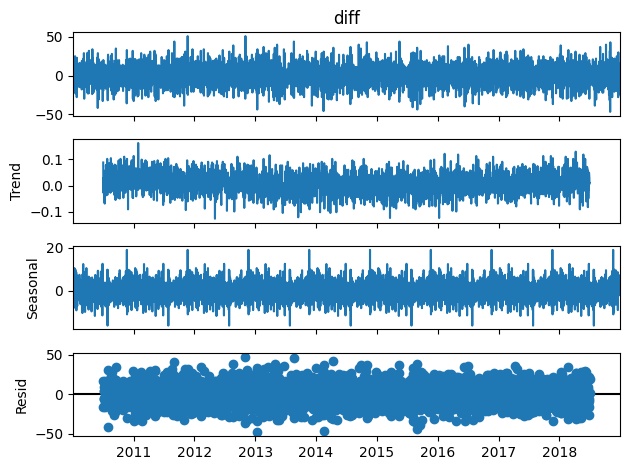

In [17]:
# Plot ACF and PACF
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
plot_acf(tdf['diff'], lags=365, ax=axes[0])  # ACF plot
plot_pacf(tdf['diff'], lags=365, ax=axes[1])  # PACF plot
plt.show()
decomposition = seasonal_decompose(tdf['diff'], model='additive', period=365)
decomposition.plot()
plt.show()

## AutoRegressive Model (AR Model) ##

In [18]:
# importing
from statsmodels.tsa.ar_model import AutoReg


In [19]:
# Model
ar_model = AutoReg(tdf['number_sold'], lags=365)
ar=ar_model.fit()
print(ar.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                            AutoReg Model Results                             
Dep. Variable:            number_sold   No. Observations:                 3286
Model:                   AutoReg(365)   Log Likelihood              -10675.663
Method:               Conditional MLE   S.D. of innovations              9.355
Date:                Wed, 01 Jan 2025   AIC                          22085.326
Time:                        08:58:18   BIC                          24279.869
Sample:                    01-02-2011   HQIC                         22875.769
                         - 12-31-2018                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               90.9126     35.193      2.583      0.010      21.935     159.890
number_sold.L1       0.0092      0.018      0.496      0.620      -0.027       0.045
number_sold.L2       0.0356 

In [20]:
# Predict
forecast=ar.predict(start=len(tdf), end=len(tdf)+364)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


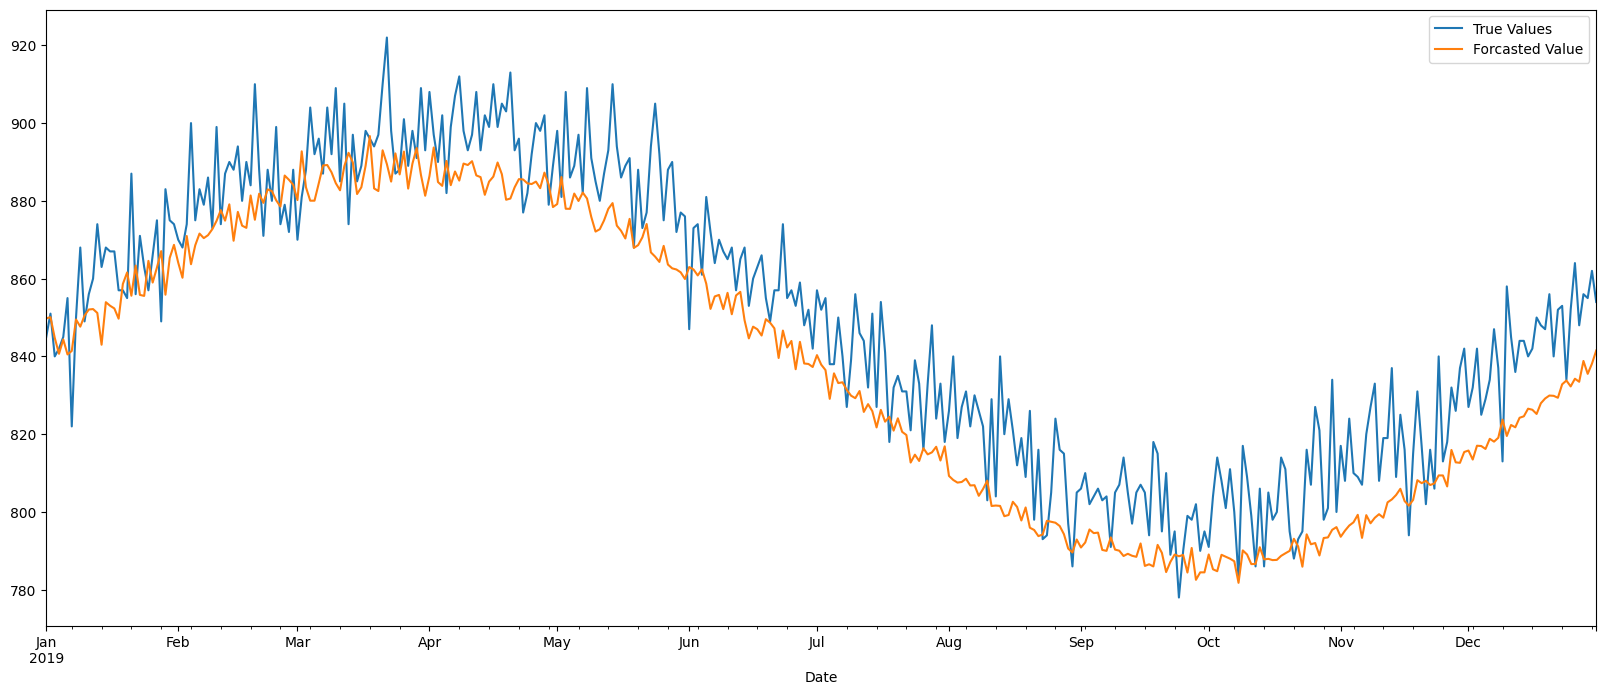

In [21]:
# plotting the true values (testing data) and the forcasted one
tedf['number_sold'].plot(figsize=(20,8),label='True Values')
forecast.plot(figsize=(20,8),label='Forcasted Value')
plt.legend()
plt.show()

## Evaluation Metrics ##

In [22]:
# importing
from statsmodels.tools.eval_measures import rmse
from sklearn.metrics import mean_absolute_percentage_error

In [23]:
print("Root Mean Squared Error: ",rmse(tedf['number_sold'],forecast))
print("Mean Absolute Percentage Error: ",mean_absolute_percentage_error(tedf['number_sold'],forecast))

Root Mean Squared Error:  16.52780991842274
Mean Absolute Percentage Error:  0.01644323075633067


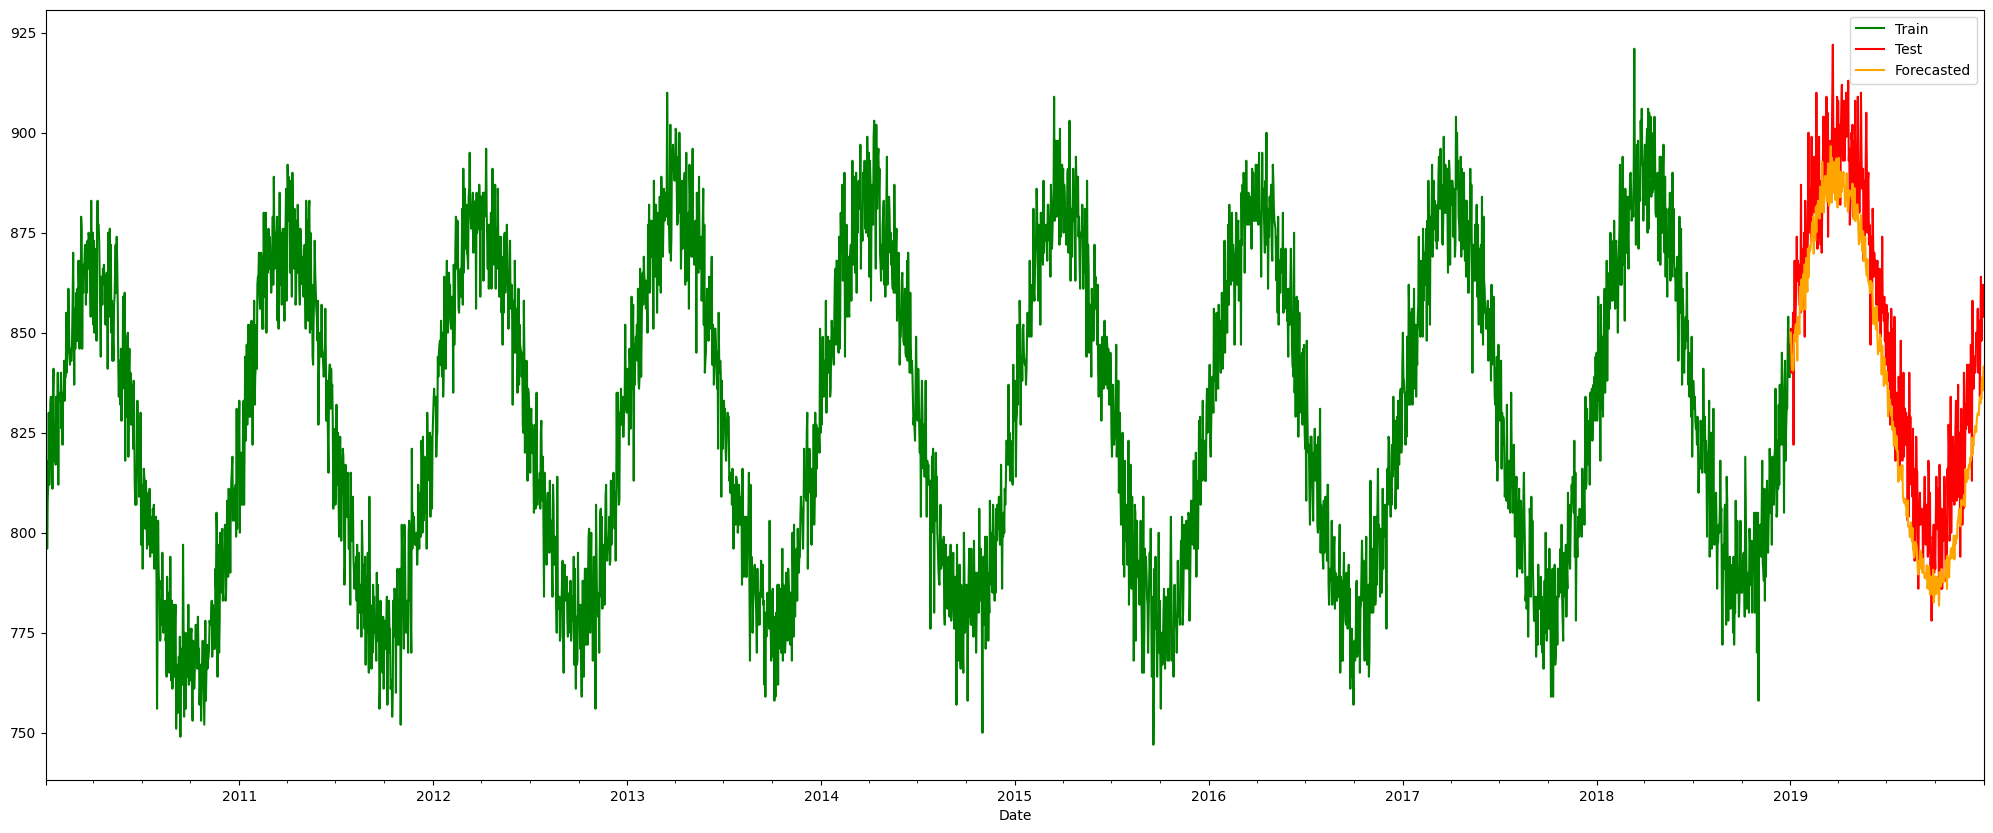

In [24]:
# Plot

plt.figure(figsize=(25,10))
tdf['number_sold'].plot(label='Train',color='green')
tedf['number_sold'].plot(label='Test',color='red')
forecast.plot(label='Forecasted',color='orange')
plt.legend()
plt.show()

****
# Time Series for the rest of the Stores and Products #
****

In [25]:
# importing 
import warnings
from sklearn.preprocessing import StandardScaler

In [26]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=Warning)

# Initialize an empty list to store results
results_list = []

# Get unique stores and products
unique_stores = tr['store'].unique()
unique_products = tr['product'].unique()

# Loop through each store-product combination
for store in unique_stores:
    for product in unique_products:
        # Filter data for the current store and product
        tdf = tr.loc[(tr['store'] == store) & (tr['product'] == product)].copy()
        tdf.drop(columns=['store', 'product'], inplace=True)
        tdf['Date'] = pd.to_datetime(tdf['Date'], format='%Y-%m-%d')
        tdf.set_index('Date', inplace=True)
        
        tedf = te.loc[(te['store'] == store) & (te['product'] == product)].copy()
        tedf.drop(columns=['store', 'product'], inplace=True)
        tedf['Date'] = pd.to_datetime(tedf['Date'], format='%Y-%m-%d')
        tedf.set_index('Date', inplace=True)

        # Differencing to make the series stationary if needed
        tdf['diff'] = tdf['number_sold'] - tdf['number_sold'].shift(1)
        tdf.dropna(inplace=True)

        # Fit an AutoRegressive model
        ar_model = AutoReg(tdf['number_sold'], lags=365)
        ar = ar_model.fit()
        
        # Forecast
        forecast = ar.predict(start=len(tdf), end=len(tdf) + 364)
        
        # Calculate RMSE and MAPE
        rmse_value = np.sqrt(((tedf['number_sold'] - forecast) ** 2).mean())  # RMSE calculation
        mape_value = mean_absolute_percentage_error(tedf['number_sold'], forecast)  # MAPE calculation
        
        # Append the results to the list
        results_list.append({'store': store, 'product': product, 'RMSE': rmse_value, 'MAPE': mape_value, 'MAPE_Percentage': mape_value * 100})

# Convert the results list to a DataFrame
fdf = pd.DataFrame(results_list)

# Create separate DataFrames for each store
store_dfs = {}
for store in unique_stores:
    store_dfs[store] = fdf[fdf['store'] == store].reset_index(drop=True)

# Display the DataFrame for each store 
print("Evalution metrics for Each store and product\'s number sold between the Test Data and the Forecasted Data between 2019-01-01 and 2019-12-31\n\n\n")
for store, df in store_dfs.items():
    print(f"Store {store}:")
    print(df)
    print("\n")


Evalution metrics for Each store and product's number sold between the Test Data and the Forecasted Data between 2019-01-01 and 2019-12-31



Store 0:
   store  product       RMSE      MAPE  MAPE_Percentage
0      0        0  16.527810  0.016443         1.644323
1      0        1  12.629135  0.016255         1.625537
2      0        2  21.688389  0.018356         1.835580
3      0        3  14.927123  0.013392         1.339210
4      0        4  14.270573  0.012630         1.262995
5      0        5  24.900168  0.022316         2.231599
6      0        6  13.218598  0.012531         1.253133
7      0        7  24.092928  0.019859         1.985891
8      0        8  10.440130  0.015762         1.576178
9      0        9  15.471109  0.014221         1.422056


Store 1:
   store  product       RMSE      MAPE  MAPE_Percentage
0      1        0  21.023476  0.024910         2.490960
1      1        1  26.013803  0.027389         2.738926
2      1        2  20.567340  0.024444         2.44435

****
# Conclusion #
****
**The Evaluation metrics are good but not impressive, it can be better if we use any other algorithm or scale the data**

****
# Feedback and Sugggestions #
****
**If you found this notebook helpful or if you liked it kindly Upvote :)**

**Kindly provide feedback and suggestions to improve this notebook**